In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)  # for reproducibility
n_samples = 1000
platforms = ['TV', 'Radio', 'Social Media']
segments = ['Youth', 'Adults', 'Seniors']

data = {
    'ad_spend': np.random.uniform(100, 5000, n_samples),
    'target_segment': np.random.choice(segments, n_samples),
    'platform': np.random.choice(platforms, n_samples),
}
df = pd.DataFrame(data)

df['sales'] = (
    500 +
    0.7 * df['ad_spend'] +
    np.random.normal(0, 100, n_samples) +
    df['platform'].apply(lambda x: {'TV': 200, 'Radio': 100, 'Social Media': 150}[x]) +
    df['target_segment'].apply(lambda x: {'Youth': 50, 'Adults': 80, 'Seniors': 30}[x])
)

In [3]:
df_encoded = pd.get_dummies(df, columns=['target_segment', 'platform'], drop_first=True)

features = df_encoded.drop('sales', axis=1)
target = df_encoded['sales']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [5]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

coefficients = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coefficients.sort_values(by='coefficient', ascending=False))

Mean Squared Error: 9916.13
R-squared (R²): 0.99

Model Coefficients:
                  feature  coefficient
4             platform_TV    92.697344
3   platform_Social Media    47.272239
0                ad_spend     0.699361
2    target_segment_Youth   -34.792683
1  target_segment_Seniors   -59.566186


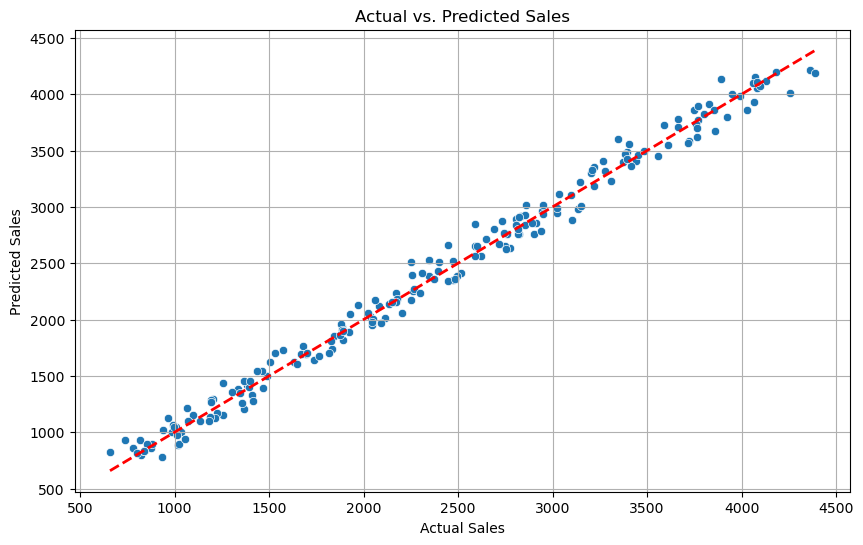

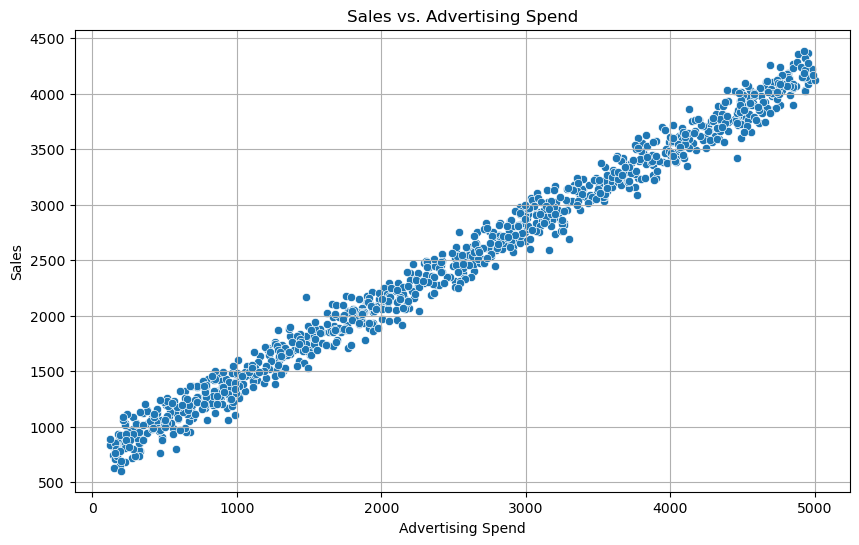

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ad_spend', y='sales', data=df)
plt.title('Sales vs. Advertising Spend')
plt.xlabel('Advertising Spend')
plt.ylabel('Sales')
plt.grid(True)
plt.show()